Data Cleaning Script

In [1]:
#import statements
import pandas as pd
from datetime import datetime, timedelta
import missingno as msno

In [2]:
#reading the uncleaned csv
df = pd.read_csv("Jobs_All.csv")
df.head()

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Salary,Job_Tyoe,Job_description,Post_Date
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362","$50,000 - $90,000 a year",Full-time\n+1,Our ideal candidate will competently manage a ...,Posted\nPosted 30+ days ago
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,"From $100,000 a year",Full-time\n+1,We will provide in-house systems and complianc...,Posted\nPosted 5 days ago
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.3,+1 location\nRemote,"$133,000 a year",NaN,Colorado residents only: Minimum salary of $10...,Posted\nPosted 30+ days ago
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.5,"San Francisco, CA 94134 \n(Bayview Hunters Poi...","$75,000 - $110,000 a year",Full-time,Odoo ERP system is enterprise resource plannin...,Employer\nActive 5 days ago
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,"Hyannis, MA\n+1 location","$70,000 - $85,000 a year",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,Posted\nPosted 30+ days ago


In [3]:
#show the number of rows and columns
df.shape

(3782, 10)

In [4]:
#count the number of null values in each column
df.isna().sum()

Job_Titile           0
Job_URL              0
Company_URL        689
Company            186
Rating             689
Location             0
Salary             591
Job_Tyoe           784
Job_description     81
Post_Date          145
dtype: int64

Heatmaps

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

<AxesSubplot:>

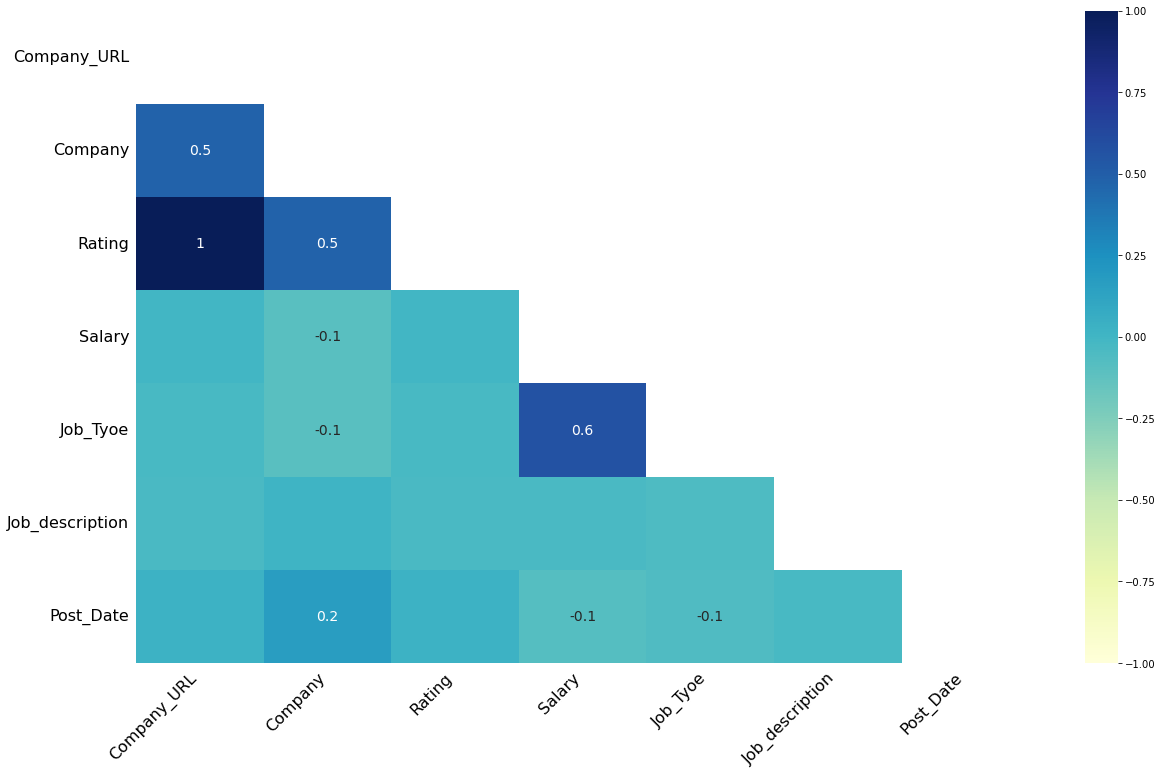

In [5]:
#graph1 to show the null values
msno.heatmap(df, cmap='YlGnBu')

Dendrogram

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy ) to bin variables against one another by their nullity correlation (measured in terms of binary distance).

<AxesSubplot:>

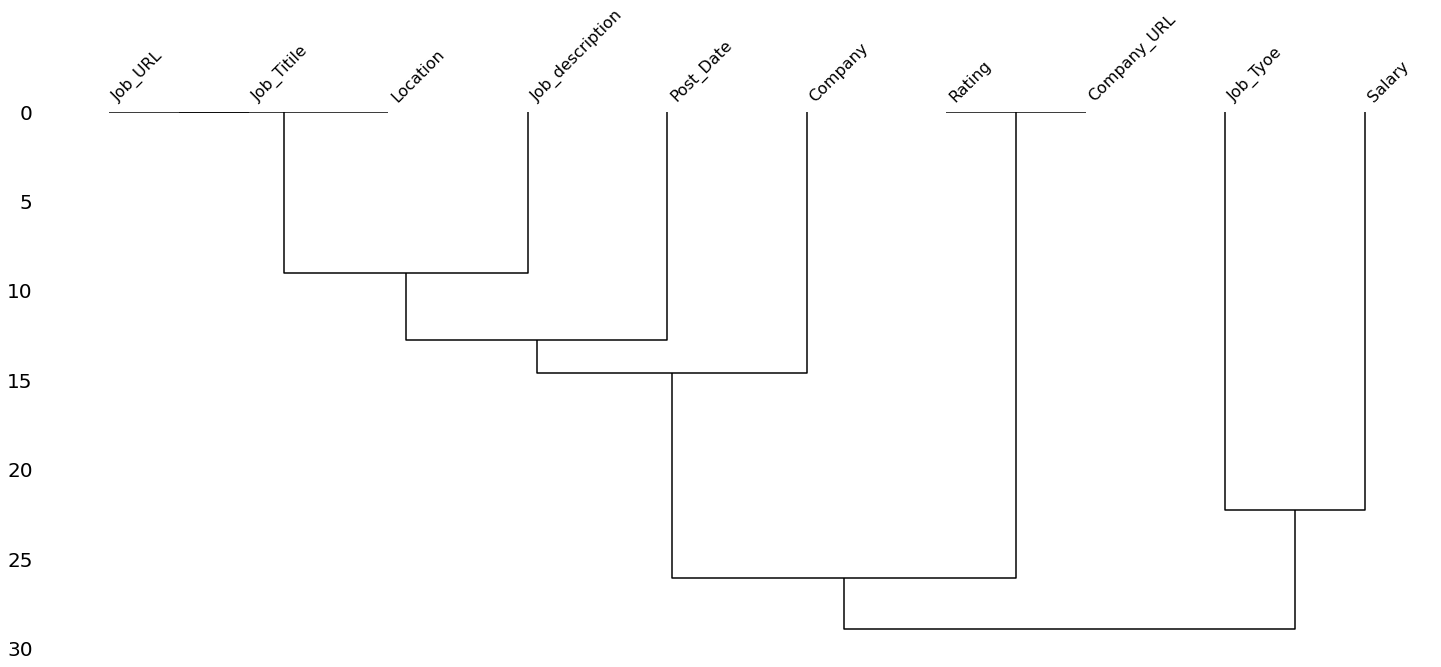

In [6]:
#graph2 to show the null values
msno.dendrogram(df)

Bars: Bar These bars show the values that are proportional to the non-missing data in the dataset.

<AxesSubplot:>

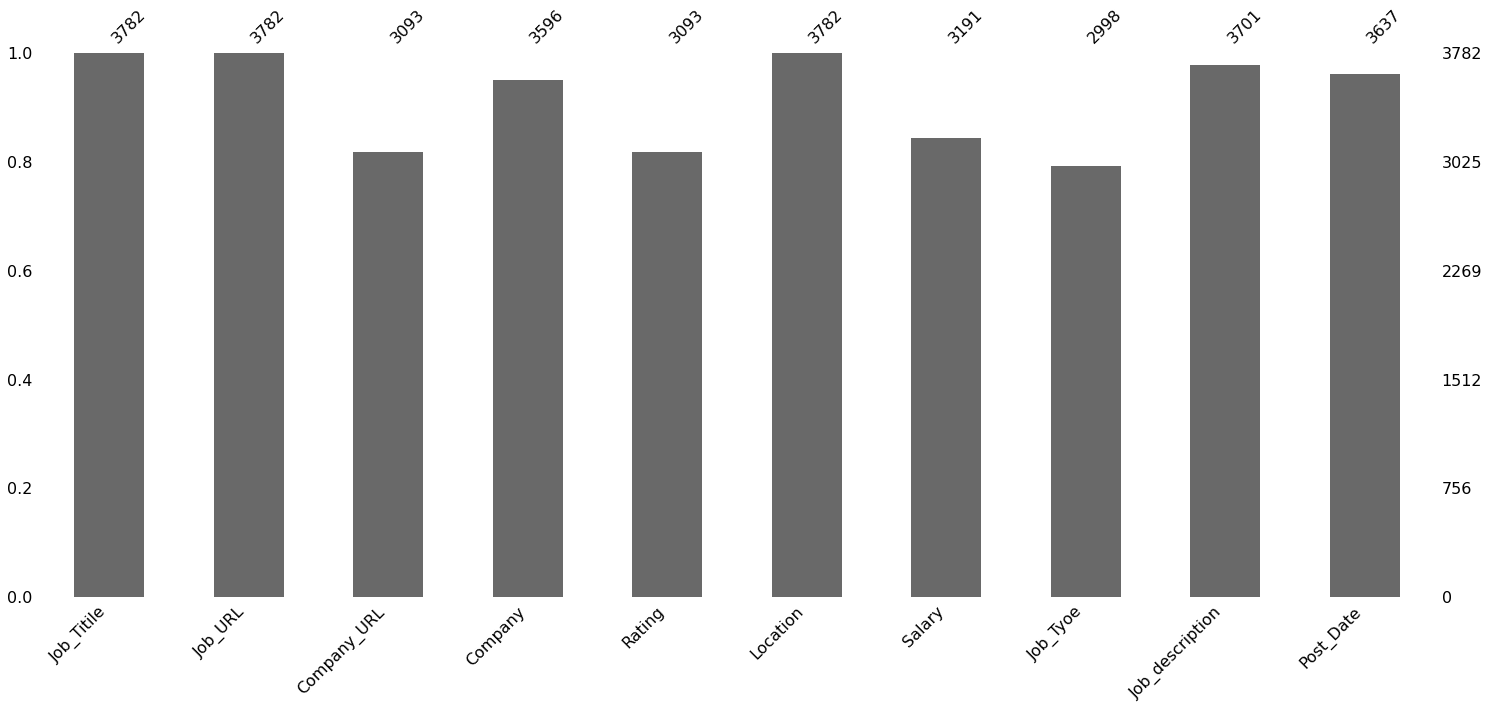

In [7]:
#graph4 to show the null values
msno.bar(df)

Martix: It is a data-dense display which lets you quickly visually pick out patterns in data completion.

<AxesSubplot:>

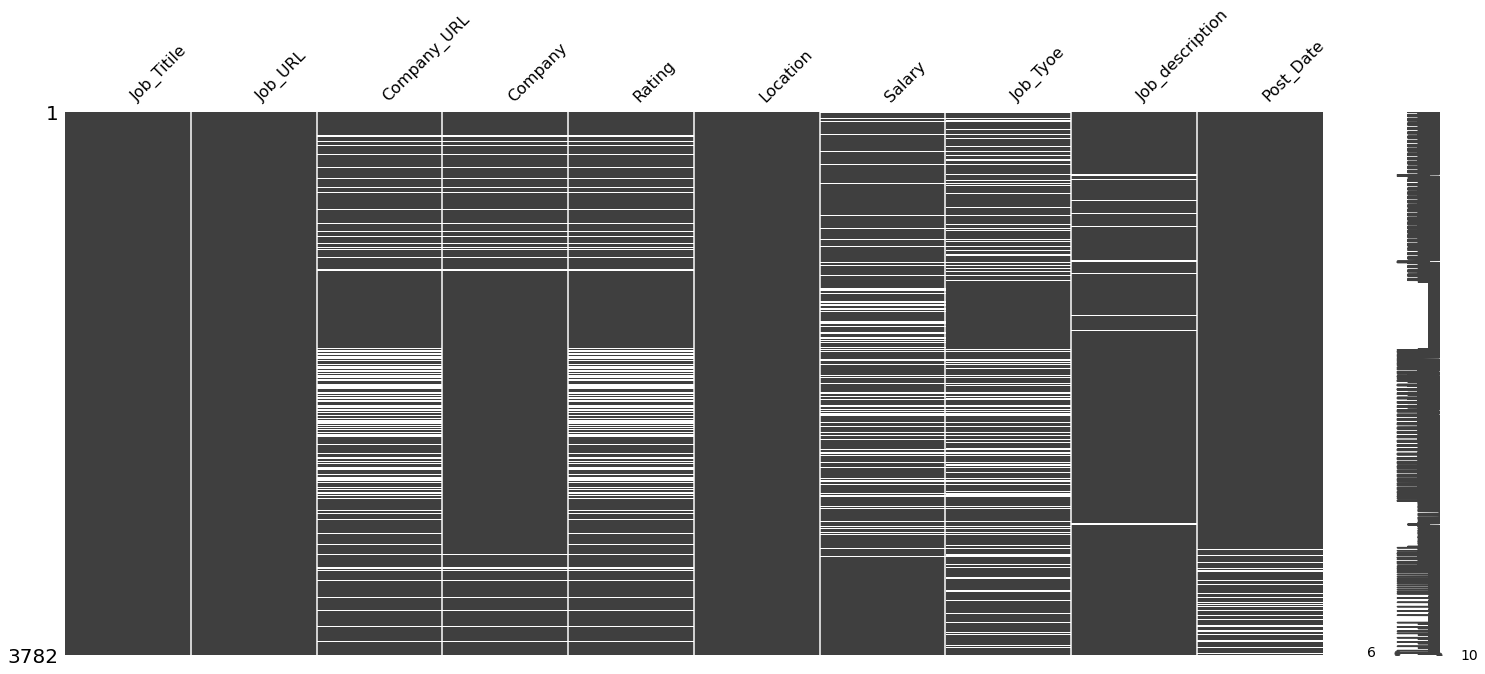

In [8]:
#graph4 to show the null values
msno.matrix(df)

Data Validation:
    
Completeness: refers to the extent to which an entity contains the information needed to describe a real-world object. The presence of null values, which are typically regarded as missing values, in tables in relational database systems can be used to determine how full a table is.
    
Consistency: The degree to which a set of semantic rules are violated such as a specific data type, an interval for a numerical column, or a set of values for a categorical column.
    
Accuracy: The correctness of the data and can be measured in two dimensions: syntactic and semantic. Semantic accuracy contrasts a value with its actual representation, while syntactic accuracy compares a value's representation with a domain of definition that corresponds.

In [9]:
#check the datatypes of the columns
df.dtypes

Job_Titile          object
Job_URL             object
Company_URL         object
Company             object
Rating             float64
Location            object
Salary              object
Job_Tyoe            object
Job_description     object
Post_Date           object
dtype: object

In [10]:
#get the stats for the numbered columns
df.describe()

,Rating
count,3093.000000
mean,3.861461
std,0.435425
min,2.500000
25%,3.600000
50%,3.900000
75%,4.100000
max,5.000000


In [11]:
#Since salary has a lot of content, let's keep to only a number
#display the Salary Column
df['Salary']

0        $50,000 - $90,000 a year
1            From $100,000 a year
2                 $133,000 a year
3       $75,000 - $110,000 a year
4        $70,000 - $85,000 a year
                  ...            
3777                    Full-time
3778                    Full-time
3779                    Full-time
3780               $68,640 a year
3781                    Full-time
Name: Salary, Length: 3782, dtype: object

In [12]:
#replace all the characters 
df['Salary'] = df['Salary'].str.replace('Estimated ','').str.replace(' a year','').str.replace('From','').str.replace('-','').str.replace('a month','').str.replace('an hour','')
df['Salary'] = df['Salary'].str.replace('Fulltime','').str.replace('\n+1','').str.replace('Parttime','').str.replace('Up to','').str.replace('a year','').str.replace('$','')

/var/folders/q2/rrpc1xwj3fd3w1qkrnk4q3j00000gn/T/ipykernel_47681/728174517.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary'] = df['Salary'].str.replace('Fulltime','').str.replace('\n+1','').str.replace('Parttime','').str.replace('Up to','').str.replace('a year','').str.replace('$','')
/var/folders/q2/rrpc1xwj3fd3w1qkrnk4q3j00000gn/T/ipykernel_47681/728174517.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace('Fulltime','').str.replace('\n+1','').str.replace('Parttime','').str.replace('Up to','').str.replace('a year','').str.replace('$','')


In [13]:
#displays the Salary Column with a range
df['Salary']

0        50,000  90,000
1               100,000
2               133,000
3       75,000  110,000
4        70,000  85,000
             ...       
3777                   
3778                   
3779                   
3780             68,640
3781                   
Name: Salary, Length: 3782, dtype: object

In [14]:
#let's keep only one part of the salary
#split salary as salary1 and salary2
#and notice that only salary1 and salary2 are added
df1 = df['Salary'].str.split(n=1, expand=True)
df1.columns = ['Salary{}'.format(x+1) for x in df1.columns]

df = df.join(df1)
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Salary,Job_Tyoe,Job_description,Post_Date,Salary1,Salary2
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362","50,000 90,000",Full-time\n+1,Our ideal candidate will competently manage a ...,Posted\nPosted 30+ days ago,"50,000","90,000"
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,"100,000",Full-time\n+1,We will provide in-house systems and complianc...,Posted\nPosted 5 days ago,"100,000",None
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.3,+1 location\nRemote,"133,000",NaN,Colorado residents only: Minimum salary of $10...,Posted\nPosted 30+ days ago,"133,000",None
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.5,"San Francisco, CA 94134 \n(Bayview Hunters Poi...","75,000 110,000",Full-time,Odoo ERP system is enterprise resource plannin...,Employer\nActive 5 days ago,"75,000","110,000"
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,"Hyannis, MA\n+1 location","70,000 85,000",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,Posted\nPosted 30+ days ago,"70,000","85,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,Software Engineer (Remote USA Only),https://www.indeed.com/rc/clk?jk=2d1bcaf75519d...,https://www.indeed.com/cmp/Experian,Experian,3.6,"Remote in Boston, MA 02108\n+3 locations",,Full-time,In addition to a competitive base salary and v...,Posted\nPosted 2 days ago,None,None
3778,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,https://www.indeed.com/cmp/Wise-6,Wise,4.1,"Austin, TX",,Full-time,At Wise you'll work on challenging technical p...,Posted\nPosted 4 days ago,None,None
3779,2023 University Graduate - Software Developmen...,https://www.indeed.com/rc/clk?jk=5d518aade2b7c...,https://www.indeed.com/cmp/Adobe,Adobe,4.3,"Seattle, WA 98103 \n(Fremont area)\n+5 locations",,Full-time,Adobe is seeking talented and passionate Softw...,Posted\nPosted 26 days ago,None,None
3780,Software Engineer (Remote Work Options),https://www.indeed.com/rc/clk?jk=fdfd4880ee0af...,https://www.indeed.com/cmp/Shelter-Insurance,Shelter Insurance,3.7,"Remote in Columbia, MO","68,640",Full-time\n+1,"Develop, test, maintain and document software ...",Posted\nPosted 2 days ago,"68,640",None


In [15]:
#replace all the characters 
df['Salary1'] = df['Salary1'].str.replace(',','').str.replace('Up','').str.replace(' ','').str.replace('Contract','').str.replace('Internship','').str.replace('None','')
df['Salary1'] = df['Salary1'].str.replace('.','').str.replace('K','00').str.replace('Temporary','')

/var/folders/q2/rrpc1xwj3fd3w1qkrnk4q3j00000gn/T/ipykernel_47681/1410569658.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary1'] = df['Salary1'].str.replace('.','').str.replace('K','00').str.replace('Temporary','')


In [16]:
#display salary1 
df['Salary1']

0        50000
1       100000
2       133000
3        75000
4        70000
         ...  
3777      None
3778      None
3779      None
3780     68640
3781      None
Name: Salary1, Length: 3782, dtype: object

In [17]:
#get rid of '' error
salaries = []
for sal in df['Salary1']:
    if(sal != '' and sal is not None and sal == sal):
        sal = int(sal)
    elif(sal == ''):
        sal = '0'
    else:
        sal = sal
    salaries.append(sal)

In [18]:
#update the salary1
df['Salary1'] = salaries

In [19]:
#convert the salary1 data type from object to float
df['Salary1'] = df['Salary1'].astype('float64') 

In [20]:
#let's check if it's reflected
df.dtypes

Job_Titile          object
Job_URL             object
Company_URL         object
Company             object
Rating             float64
Location            object
Salary              object
Job_Tyoe            object
Job_description     object
Post_Date           object
Salary1            float64
Salary2             object
dtype: object

In [21]:
#delete salary and salary2 column as we are considering only one part of the salary
df.drop(['Salary', 'Salary2'], axis=1, inplace=True)

In [22]:
#display the salary and notice that only salary1 is present
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary1
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,Posted\nPosted 30+ days ago,50000.0
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,Full-time\n+1,We will provide in-house systems and complianc...,Posted\nPosted 5 days ago,100000.0
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.3,+1 location\nRemote,NaN,Colorado residents only: Minimum salary of $10...,Posted\nPosted 30+ days ago,133000.0
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.5,"San Francisco, CA 94134 \n(Bayview Hunters Poi...",Full-time,Odoo ERP system is enterprise resource plannin...,Employer\nActive 5 days ago,75000.0
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,"Hyannis, MA\n+1 location",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,Posted\nPosted 30+ days ago,70000.0
...,...,...,...,...,...,...,...,...,...,...
3777,Software Engineer (Remote USA Only),https://www.indeed.com/rc/clk?jk=2d1bcaf75519d...,https://www.indeed.com/cmp/Experian,Experian,3.6,"Remote in Boston, MA 02108\n+3 locations",Full-time,In addition to a competitive base salary and v...,Posted\nPosted 2 days ago,NaN
3778,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,https://www.indeed.com/cmp/Wise-6,Wise,4.1,"Austin, TX",Full-time,At Wise you'll work on challenging technical p...,Posted\nPosted 4 days ago,NaN
3779,2023 University Graduate - Software Developmen...,https://www.indeed.com/rc/clk?jk=5d518aade2b7c...,https://www.indeed.com/cmp/Adobe,Adobe,4.3,"Seattle, WA 98103 \n(Fremont area)\n+5 locations",Full-time,Adobe is seeking talented and passionate Softw...,Posted\nPosted 26 days ago,NaN
3780,Software Engineer (Remote Work Options),https://www.indeed.com/rc/clk?jk=fdfd4880ee0af...,https://www.indeed.com/cmp/Shelter-Insurance,Shelter Insurance,3.7,"Remote in Columbia, MO",Full-time\n+1,"Develop, test, maintain and document software ...",Posted\nPosted 2 days ago,68640.0


In [23]:
#replace the column name Salary1 with Salary
df = df.rename({'Salary1': 'Salary'}, axis=1)

In [24]:
#let's see how the dataframe looks now
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,Posted\nPosted 30+ days ago,50000.0
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,Full-time\n+1,We will provide in-house systems and complianc...,Posted\nPosted 5 days ago,100000.0
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.3,+1 location\nRemote,NaN,Colorado residents only: Minimum salary of $10...,Posted\nPosted 30+ days ago,133000.0
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.5,"San Francisco, CA 94134 \n(Bayview Hunters Poi...",Full-time,Odoo ERP system is enterprise resource plannin...,Employer\nActive 5 days ago,75000.0
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,"Hyannis, MA\n+1 location",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,Posted\nPosted 30+ days ago,70000.0
...,...,...,...,...,...,...,...,...,...,...
3777,Software Engineer (Remote USA Only),https://www.indeed.com/rc/clk?jk=2d1bcaf75519d...,https://www.indeed.com/cmp/Experian,Experian,3.6,"Remote in Boston, MA 02108\n+3 locations",Full-time,In addition to a competitive base salary and v...,Posted\nPosted 2 days ago,NaN
3778,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,https://www.indeed.com/cmp/Wise-6,Wise,4.1,"Austin, TX",Full-time,At Wise you'll work on challenging technical p...,Posted\nPosted 4 days ago,NaN
3779,2023 University Graduate - Software Developmen...,https://www.indeed.com/rc/clk?jk=5d518aade2b7c...,https://www.indeed.com/cmp/Adobe,Adobe,4.3,"Seattle, WA 98103 \n(Fremont area)\n+5 locations",Full-time,Adobe is seeking talented and passionate Softw...,Posted\nPosted 26 days ago,NaN
3780,Software Engineer (Remote Work Options),https://www.indeed.com/rc/clk?jk=fdfd4880ee0af...,https://www.indeed.com/cmp/Shelter-Insurance,Shelter Insurance,3.7,"Remote in Columbia, MO",Full-time\n+1,"Develop, test, maintain and document software ...",Posted\nPosted 2 days ago,68640.0


In [25]:
#update the stats for Salary column
df.describe()

,Rating,Salary
count,3093.000000,2452.000000
mean,3.861461,68641.781811
std,0.435425,42310.458293
min,2.500000,0.000000
25%,3.600000,46400.000000
50%,3.900000,72500.000000
75%,4.100000,100000.000000
max,5.000000,170000.000000


In [26]:
#fill the null values of Salary column with the mean salary
df.fillna({"Salary":df['Salary'].mean(),},inplace=True)

In [27]:
#the salary columns is updated
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,Posted\nPosted 30+ days ago,50000.000000
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,Full-time\n+1,We will provide in-house systems and complianc...,Posted\nPosted 5 days ago,100000.000000
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.3,+1 location\nRemote,NaN,Colorado residents only: Minimum salary of $10...,Posted\nPosted 30+ days ago,133000.000000
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.5,"San Francisco, CA 94134 \n(Bayview Hunters Poi...",Full-time,Odoo ERP system is enterprise resource plannin...,Employer\nActive 5 days ago,75000.000000
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,"Hyannis, MA\n+1 location",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,Posted\nPosted 30+ days ago,70000.000000
...,...,...,...,...,...,...,...,...,...,...
3777,Software Engineer (Remote USA Only),https://www.indeed.com/rc/clk?jk=2d1bcaf75519d...,https://www.indeed.com/cmp/Experian,Experian,3.6,"Remote in Boston, MA 02108\n+3 locations",Full-time,In addition to a competitive base salary and v...,Posted\nPosted 2 days ago,68641.781811
3778,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,https://www.indeed.com/cmp/Wise-6,Wise,4.1,"Austin, TX",Full-time,At Wise you'll work on challenging technical p...,Posted\nPosted 4 days ago,68641.781811
3779,2023 University Graduate - Software Developmen...,https://www.indeed.com/rc/clk?jk=5d518aade2b7c...,https://www.indeed.com/cmp/Adobe,Adobe,4.3,"Seattle, WA 98103 \n(Fremont area)\n+5 locations",Full-time,Adobe is seeking talented and passionate Softw...,Posted\nPosted 26 days ago,68641.781811
3780,Software Engineer (Remote Work Options),https://www.indeed.com/rc/clk?jk=fdfd4880ee0af...,https://www.indeed.com/cmp/Shelter-Insurance,Shelter Insurance,3.7,"Remote in Columbia, MO",Full-time\n+1,"Develop, test, maintain and document software ...",Posted\nPosted 2 days ago,68640.000000


In [28]:
#now, the post_date column should be changed and must remove all the strings
df['Post_Date']

0       Posted\nPosted 30+ days ago
1         Posted\nPosted 5 days ago
2       Posted\nPosted 30+ days ago
3       Employer\nActive 5 days ago
4       Posted\nPosted 30+ days ago
                   ...             
3777      Posted\nPosted 2 days ago
3778      Posted\nPosted 4 days ago
3779     Posted\nPosted 26 days ago
3780      Posted\nPosted 2 days ago
3781      Posted\nPosted 6 days ago
Name: Post_Date, Length: 3782, dtype: object

In [29]:
#Replace all the string values
df ['Post_Date'] = df['Post_Date'].str.replace('Posted\nPosted','').str.replace(' days ago','').str.replace('+','').str.replace(' day ago','')
df['Post_Date'] = df['Post_Date'].str.replace('Posted\nToday','').str.replace('Employer\nActive 5','').str.replace('Employer\nActive ','').str.replace('Hiring ongoing','').str.replace('Posted\nJust posted','0')

/var/folders/q2/rrpc1xwj3fd3w1qkrnk4q3j00000gn/T/ipykernel_47681/4082833382.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df ['Post_Date'] = df['Post_Date'].str.replace('Posted\nPosted','').str.replace(' days ago','').str.replace('+','').str.replace(' day ago','')


In [30]:
#lets initialize the datetime
today = datetime.today()
yesterday = today - timedelta(days=1)
one_week_ago = today - timedelta(days=7)
thirty_days_ago = today - timedelta(days=30)
print(today.strftime("%m/%d/%y"))

12/05/22


In [31]:
#get rid of '' error
dates = []
for date in df['Post_Date']:
    if(date != '' and date is not None and date == date):
        date = (today - timedelta(days=int(date))).strftime("%m/%d/%y")
    dates.append(date)

In [32]:
#update the Post_Date
df['Post_Date'] = dates

In [33]:
#display the dataframe after the changes
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,11/05/22,50000.000000
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,Full-time\n+1,We will provide in-house systems and complianc...,11/30/22,100000.000000
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.3,+1 location\nRemote,NaN,Colorado residents only: Minimum salary of $10...,11/05/22,133000.000000
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.5,"San Francisco, CA 94134 \n(Bayview Hunters Poi...",Full-time,Odoo ERP system is enterprise resource plannin...,,75000.000000
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,"Hyannis, MA\n+1 location",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,11/05/22,70000.000000
...,...,...,...,...,...,...,...,...,...,...
3777,Software Engineer (Remote USA Only),https://www.indeed.com/rc/clk?jk=2d1bcaf75519d...,https://www.indeed.com/cmp/Experian,Experian,3.6,"Remote in Boston, MA 02108\n+3 locations",Full-time,In addition to a competitive base salary and v...,12/03/22,68641.781811
3778,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,https://www.indeed.com/cmp/Wise-6,Wise,4.1,"Austin, TX",Full-time,At Wise you'll work on challenging technical p...,12/01/22,68641.781811
3779,2023 University Graduate - Software Developmen...,https://www.indeed.com/rc/clk?jk=5d518aade2b7c...,https://www.indeed.com/cmp/Adobe,Adobe,4.3,"Seattle, WA 98103 \n(Fremont area)\n+5 locations",Full-time,Adobe is seeking talented and passionate Softw...,11/09/22,68641.781811
3780,Software Engineer (Remote Work Options),https://www.indeed.com/rc/clk?jk=fdfd4880ee0af...,https://www.indeed.com/cmp/Shelter-Insurance,Shelter Insurance,3.7,"Remote in Columbia, MO",Full-time\n+1,"Develop, test, maintain and document software ...",12/03/22,68640.000000


In [34]:
#change the data type from object to datetime
df["Post_Date"] = pd.to_datetime(df["Post_Date"])

In [35]:
#verify the changes 
df.dtypes

Job_Titile                 object
Job_URL                    object
Company_URL                object
Company                    object
Rating                    float64
Location                   object
Job_Tyoe                   object
Job_description            object
Post_Date          datetime64[ns]
Salary                    float64
dtype: object

In [36]:
#fill the null values of Rating column with the mean Rating
df.fillna({"Rating":df['Rating'].mean(),},inplace=True)

In [37]:
#display the changes
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.900000,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,2022-11-05,50000.000000
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.800000,Remote,Full-time\n+1,We will provide in-house systems and complianc...,2022-11-30,100000.000000
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.300000,+1 location\nRemote,NaN,Colorado residents only: Minimum salary of $10...,2022-11-05,133000.000000
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.500000,"San Francisco, CA 94134 \n(Bayview Hunters Poi...",Full-time,Odoo ERP system is enterprise resource plannin...,NaT,75000.000000
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,3.861461,"Hyannis, MA\n+1 location",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,2022-11-05,70000.000000
...,...,...,...,...,...,...,...,...,...,...
3777,Software Engineer (Remote USA Only),https://www.indeed.com/rc/clk?jk=2d1bcaf75519d...,https://www.indeed.com/cmp/Experian,Experian,3.600000,"Remote in Boston, MA 02108\n+3 locations",Full-time,In addition to a competitive base salary and v...,2022-12-03,68641.781811
3778,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,https://www.indeed.com/cmp/Wise-6,Wise,4.100000,"Austin, TX",Full-time,At Wise you'll work on challenging technical p...,2022-12-01,68641.781811
3779,2023 University Graduate - Software Developmen...,https://www.indeed.com/rc/clk?jk=5d518aade2b7c...,https://www.indeed.com/cmp/Adobe,Adobe,4.300000,"Seattle, WA 98103 \n(Fremont area)\n+5 locations",Full-time,Adobe is seeking talented and passionate Softw...,2022-11-09,68641.781811
3780,Software Engineer (Remote Work Options),https://www.indeed.com/rc/clk?jk=fdfd4880ee0af...,https://www.indeed.com/cmp/Shelter-Insurance,Shelter Insurance,3.700000,"Remote in Columbia, MO",Full-time\n+1,"Develop, test, maintain and document software ...",2022-12-03,68640.000000


In [38]:
#check for the columns(Salary and Rating) that have updated with null values
df.isna().sum()

Job_Titile           0
Job_URL              0
Company_URL        689
Company            186
Rating               0
Location             0
Job_Tyoe           784
Job_description     81
Post_Date          416
Salary               0
dtype: int64

In [39]:
#duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3777     True
3778     True
3779     True
3780     True
3781     True
Length: 3782, dtype: bool

In [40]:
#initialize the values of duplicated
duplicate = df[df.duplicated()]

In [41]:
#display all the duplicate values
duplicate

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
33,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.3,+1 location\nRemote,NaN,Colorado residents only: Minimum salary of $10...,2022-11-05,133000.000000
34,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,Full-time\n+1,We will provide in-house systems and complianc...,2022-11-30,100000.000000
35,Bachelors Level - Research Analyst - Research ...,https://www.indeed.com/rc/clk?jk=d6eeee5ba859d...,https://www.indeed.com/cmp/Rti-International,RTI International,3.7,"Remote in Durham, NC 27709\n+3 locations",NaN,We are looking for an analyst who will functio...,2022-11-05,68641.781811
36,Crocs: Global Inventory Analyst,https://www.indeed.com/rc/clk?jk=bd2959ee6cdca...,https://www.indeed.com/cmp/Crocs,Crocs,3.6,"Remote in Westwood, MA",NaN,1-3 years previous experience in Inventory or ...,2022-11-24,73000.000000
39,Health Policy Analyst,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,https://www.indeed.com/cmp/Centers-For-Disease...,Centers for Disease Control and Prevention,4.2,"Hyattsville, MD",Full-time\n+1,Public Trust/Moderate Background Investigation...,2022-12-03,89834.000000
...,...,...,...,...,...,...,...,...,...,...
3777,Software Engineer (Remote USA Only),https://www.indeed.com/rc/clk?jk=2d1bcaf75519d...,https://www.indeed.com/cmp/Experian,Experian,3.6,"Remote in Boston, MA 02108\n+3 locations",Full-time,In addition to a competitive base salary and v...,2022-12-03,68641.781811
3778,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,https://www.indeed.com/cmp/Wise-6,Wise,4.1,"Austin, TX",Full-time,At Wise you'll work on challenging technical p...,2022-12-01,68641.781811
3779,2023 University Graduate - Software Developmen...,https://www.indeed.com/rc/clk?jk=5d518aade2b7c...,https://www.indeed.com/cmp/Adobe,Adobe,4.3,"Seattle, WA 98103 \n(Fremont area)\n+5 locations",Full-time,Adobe is seeking talented and passionate Softw...,2022-11-09,68641.781811
3780,Software Engineer (Remote Work Options),https://www.indeed.com/rc/clk?jk=fdfd4880ee0af...,https://www.indeed.com/cmp/Shelter-Insurance,Shelter Insurance,3.7,"Remote in Columbia, MO",Full-time\n+1,"Develop, test, maintain and document software ...",2022-12-03,68640.000000


In [42]:
#Drop all the duplicate vlaues
df = df.drop_duplicates(keep='first')

In [43]:
#display the dataframe
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.900000,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,2022-11-05,50000.000000
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.800000,Remote,Full-time\n+1,We will provide in-house systems and complianc...,2022-11-30,100000.000000
2,Recruiting Analyst,https://www.indeed.com/rc/clk?jk=fc9e8f57f0724...,https://www.indeed.com/cmp/Discord,Discord,4.300000,+1 location\nRemote,NaN,Colorado residents only: Minimum salary of $10...,2022-11-05,133000.000000
3,Legal Compliance Analyst - Hybrid job,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Odoo-Inc,Odoo Inc,4.500000,"San Francisco, CA 94134 \n(Bayview Hunters Poi...",Full-time,Odoo ERP system is enterprise resource plannin...,NaT,75000.000000
4,Board Certified Behavior Analyst (BCBA) - Cape...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,3.861461,"Hyannis, MA\n+1 location",Full-time\n+1,Full-time salaried positions: Monday-Friday (w...,2022-11-05,70000.000000
...,...,...,...,...,...,...,...,...,...,...
3698,Jr Software Engineer Java,https://www.indeed.com/rc/clk?jk=0069738a858a0...,https://www.indeed.com/cmp/Vsolvit-LLC,VSolvit LLC,3.500000,Remote,Full-time,This is a hands-on developer role with the opp...,2022-11-05,35.000000
3699,Software Development Engineer,https://www.indeed.com/rc/clk?jk=f434f985bb539...,https://www.indeed.com/cmp/CVS-Health,CVS Health,3.300000,"Remote in Florham Park, NJ 07932\n+17 locations",NaN,We strive to promote and sustain a culture of ...,NaT,46400.000000
3700,JR Software Developer (Remote),https://www.indeed.com/rc/clk?jk=e6f8c3066a981...,https://www.indeed.com/cmp/Jaggaer,Jaggaer,2.700000,"Remote in Morrisville, NC 27560",Full-time,Enjoys great satisfaction gained from helping ...,2022-11-29,68641.781811
3701,Software Engineer (Front End),https://www.indeed.com/rc/clk?jk=bcbfa1fa1f670...,"https://www.indeed.com/cmp/Amplify-Education,-...","Amplify Education, Inc.",4.000000,Remote,Full-time,"Amplify is a leader in creating immersive, rig...",2022-11-24,101000.000000


In [44]:
#drop all the null values
df = df.dropna()

In [45]:
#display the data frame
df

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,2022-11-05,50000.000000
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,Full-time\n+1,We will provide in-house systems and complianc...,2022-11-30,100000.000000
5,Program Analyst Workforce Development,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/National-Associatio...,National Association of County and City Health...,3.3,"Hybrid remote in Washington, DC 20036\n+5 loca...",Full-time,Bachelor's degree in relevant professional fie...,2022-12-01,61040.000000
7,Financial Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Maine-Machine-Produ...,Maine Machine Products (MMPCo),3.8,"South Paris, ME 04281",Full-time,We specialize in manufacturing uniquely design...,2022-11-24,68641.781811
9,Health Policy Analyst,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,https://www.indeed.com/cmp/Centers-For-Disease...,Centers for Disease Control and Prevention,4.2,"Hyattsville, MD",Full-time\n+1,Public Trust/Moderate Background Investigation...,2022-12-03,89834.000000
...,...,...,...,...,...,...,...,...,...,...
3695,Software Engineer,https://www.indeed.com/rc/clk?jk=2e62989689f15...,https://www.indeed.com/cmp/Children's-Mercy-Kc,Children's Mercy KC,3.8,"Remote in Kansas City, MO 64108",Full-time,We know that our greatest strengths come from ...,2022-11-29,68641.781811
3698,Jr Software Engineer Java,https://www.indeed.com/rc/clk?jk=0069738a858a0...,https://www.indeed.com/cmp/Vsolvit-LLC,VSolvit LLC,3.5,Remote,Full-time,This is a hands-on developer role with the opp...,2022-11-05,35.000000
3700,JR Software Developer (Remote),https://www.indeed.com/rc/clk?jk=e6f8c3066a981...,https://www.indeed.com/cmp/Jaggaer,Jaggaer,2.7,"Remote in Morrisville, NC 27560",Full-time,Enjoys great satisfaction gained from helping ...,2022-11-29,68641.781811
3701,Software Engineer (Front End),https://www.indeed.com/rc/clk?jk=bcbfa1fa1f670...,"https://www.indeed.com/cmp/Amplify-Education,-...","Amplify Education, Inc.",4.0,Remote,Full-time,"Amplify is a leader in creating immersive, rig...",2022-11-24,101000.000000


In [46]:
#check if there are any null values
df.isna().sum()

Job_Titile         0
Job_URL            0
Company_URL        0
Company            0
Rating             0
Location           0
Job_Tyoe           0
Job_description    0
Post_Date          0
Salary             0
dtype: int64

In [47]:
#check for any duplicate values
duplicate = df[df.duplicated()]
duplicate

,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary


In [48]:
#show the number of rows and columns after cleaning
df.shape

(738, 10)

<AxesSubplot:>

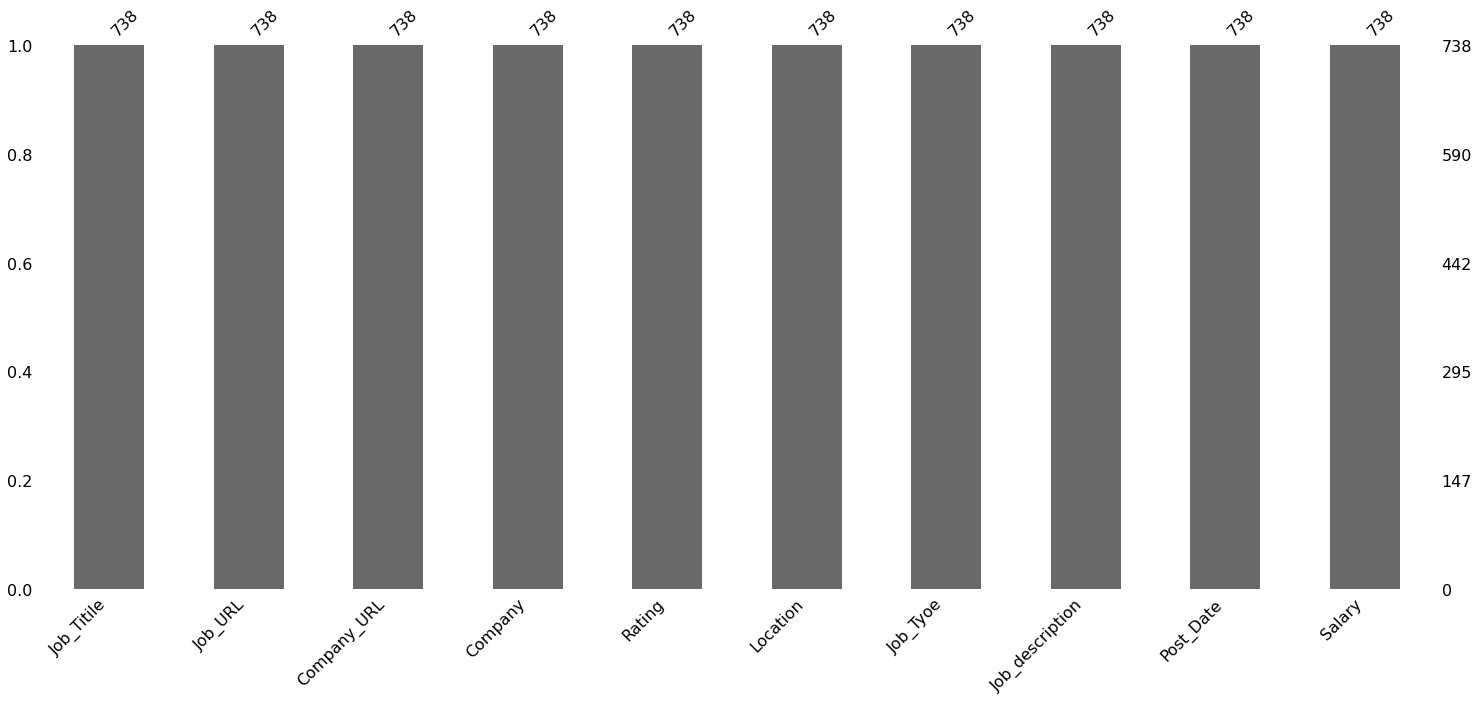

In [49]:
#graph1 after cleaning
msno.bar(df)

/Users/namithajc/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/namithajc/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

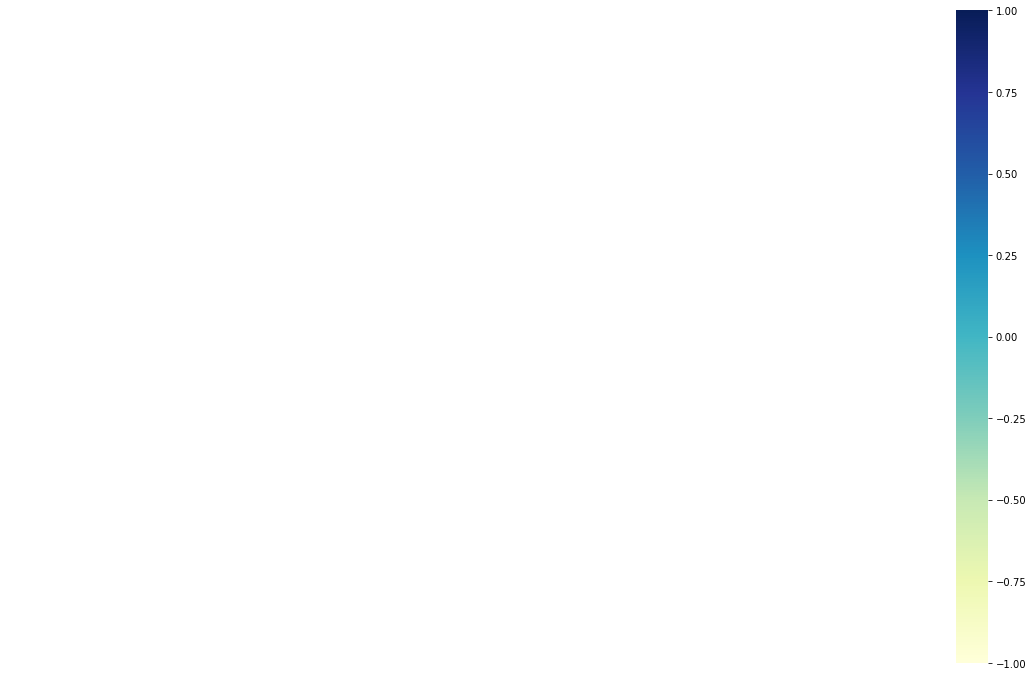

In [50]:
#graph2 after cleaning
msno.heatmap(df, cmap='YlGnBu')

<AxesSubplot:>

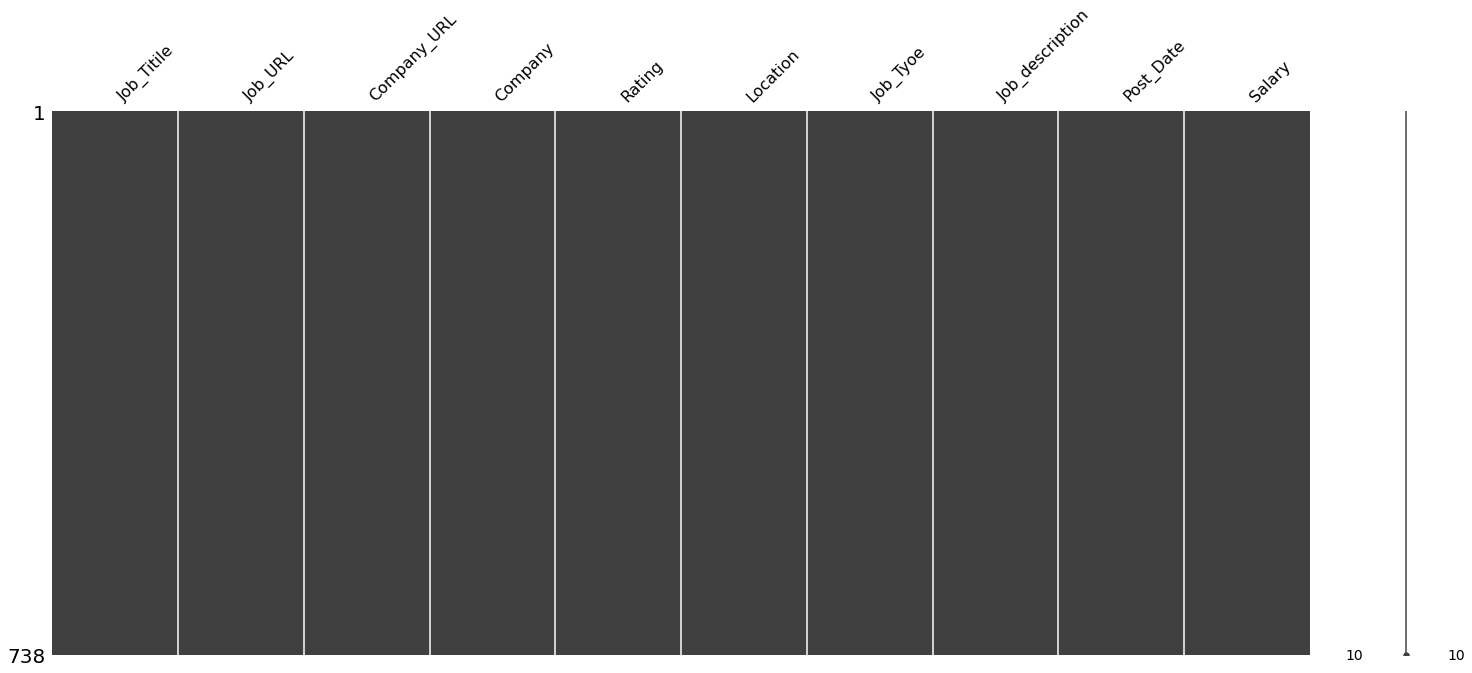

In [51]:
#graph3 after cleaning
msno.matrix(df)

/Users/namithajc/opt/anaconda3/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

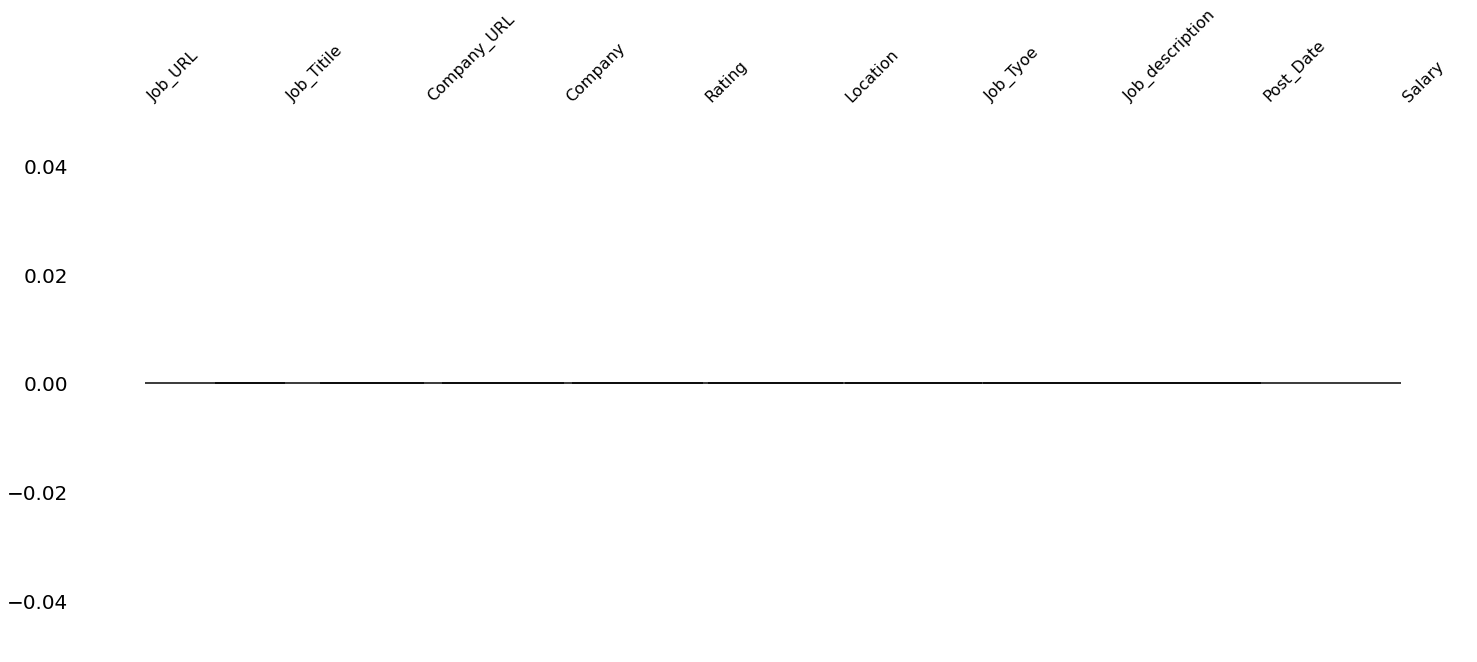

In [52]:
#graph4 after cleaning
msno.dendrogram(df)

In [53]:
#export the cleaned data into a csv file
df.to_csv("JobsFinal.csv")

Database script

In [54]:
#import statements
import sqlite3
import plotly.express as px

In [55]:
#reading the uncleaned csv
dfdb = pd.read_csv("JobsFinal.csv")
dfdb

,Unnamed: 0,Job_Titile,Job_URL,Company_URL,Company,Rating,Location,Job_Tyoe,Job_description,Post_Date,Salary
0,0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,3.9,"Lake Orion, MI 48362",Full-time\n+1,Our ideal candidate will competently manage a ...,2022-11-05,50000.000000
1,1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,3.8,Remote,Full-time\n+1,We will provide in-house systems and complianc...,2022-11-30,100000.000000
2,5,Program Analyst Workforce Development,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/National-Associatio...,National Association of County and City Health...,3.3,"Hybrid remote in Washington, DC 20036\n+5 loca...",Full-time,Bachelor's degree in relevant professional fie...,2022-12-01,61040.000000
3,7,Financial Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Maine-Machine-Produ...,Maine Machine Products (MMPCo),3.8,"South Paris, ME 04281",Full-time,We specialize in manufacturing uniquely design...,2022-11-24,68641.781811
4,9,Health Policy Analyst,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,https://www.indeed.com/cmp/Centers-For-Disease...,Centers for Disease Control and Prevention,4.2,"Hyattsville, MD",Full-time\n+1,Public Trust/Moderate Background Investigation...,2022-12-03,89834.000000
...,...,...,...,...,...,...,...,...,...,...,...
733,3695,Software Engineer,https://www.indeed.com/rc/clk?jk=2e62989689f15...,https://www.indeed.com/cmp/Children's-Mercy-Kc,Children's Mercy KC,3.8,"Remote in Kansas City, MO 64108",Full-time,We know that our greatest strengths come from ...,2022-11-29,68641.781811
734,3698,Jr Software Engineer Java,https://www.indeed.com/rc/clk?jk=0069738a858a0...,https://www.indeed.com/cmp/Vsolvit-LLC,VSolvit LLC,3.5,Remote,Full-time,This is a hands-on developer role with the opp...,2022-11-05,35.000000
735,3700,JR Software Developer (Remote),https://www.indeed.com/rc/clk?jk=e6f8c3066a981...,https://www.indeed.com/cmp/Jaggaer,Jaggaer,2.7,"Remote in Morrisville, NC 27560",Full-time,Enjoys great satisfaction gained from helping ...,2022-11-29,68641.781811
736,3701,Software Engineer (Front End),https://www.indeed.com/rc/clk?jk=bcbfa1fa1f670...,"https://www.indeed.com/cmp/Amplify-Education,-...","Amplify Education, Inc.",4.0,Remote,Full-time,"Amplify is a leader in creating immersive, rig...",2022-11-24,101000.000000


In [56]:
#connection to the Database
conn = sqlite3.connect('JobsDatabase.db')

try:
    conn.cursor()
    print("DB Connected");
except Exception as ex:
    print("DB not Connected");

DB Connected


In [57]:
#Create table JOBS_LISTING_TABLE
conn = sqlite3.connect('JobsDatabase.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS jobs_listing_table;''')
conn.execute('''CREATE TABLE IF NOT EXISTS jobs_listing_table
         (
         Job_Title TEXT  ,
         Job_Url TEXT PRIMARY KEY,
         Location TEXT  ,
         Post_Date datetime   ,
         Salary Float
         );''')

print("jobs_listing_table Table created successfully");

conn.close()

Opened database successfully
jobs_listing_table Table created successfully


In [58]:
#Create table JOBS_PROFILE_TABLE
conn = sqlite3.connect('JobsDatabase.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS jobs_profile_table;''')
conn.execute('''CREATE TABLE IF NOT EXISTS jobs_profile_table

         (
          Job_Url TEXT PRIMARY KEY ,
          Job_Description TEXT,
          Job_Rating FLOAT,
          Job_Type TEXT,
          FOREIGN KEY (job_url) REFERENCES jobs_listing_table(job_url));''')

print("jobs_profile_table Table created successfully");

conn.close()

Opened database successfully
jobs_profile_table Table created successfully


In [59]:
#Create table JOBS_DETAILS_TABLE
conn = sqlite3.connect('JobsDatabase.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS company_details_table;''')
conn.execute('''CREATE TABLE IF NOT EXISTS company_details_table

         (
          Job_Url TEXT PRIMARY KEY ,
          Company_Url TEXT,
          Company_Name FLOAT,
          Location TEXT ,
          FOREIGN KEY (job_url) REFERENCES jobs_listing_table(job_url));''')

print("jobs_profile_table Table created successfully");

conn.close()

Opened database successfully
jobs_profile_table Table created successfully


In [60]:
#Insert values into JOBS_LISTING_TABLE
conn = sqlite3.connect('JobsDatabase.db')
for row in dfdb.itertuples():
    conn.execute('INSERT or IGNORE INTO jobs_listing_table(Job_Title, Job_Url, Location, Post_Date, Salary) VALUES (?,?,?,?,?)',(
                row.Job_Titile, 
                row.Job_URL,
                row.Location,
                row.Post_Date,
                row.Salary
                )
                )
    conn.commit()
print("jobs_listing_table Table values inserted successfully");
conn.close()

jobs_listing_table Table values inserted successfully


In [61]:
#Insert values into JOBS_PROFILE_TABLE
conn = sqlite3.connect('JobsDatabase.db')
for row in dfdb.itertuples():
    conn.execute('INSERT or IGNORE INTO jobs_profile_table(Job_Url, Job_Description, Job_Rating, Job_Type) VALUES (?,?,?,?)',(
                row.Job_URL, 
                row.Job_description,
                row.Rating,
                row.Job_Tyoe
                )
                )
    conn.commit()
print("jobs_profile_table Table values inserted successfully");
conn.close()

jobs_profile_table Table values inserted successfully


In [62]:
#Insert values into COMPANY_DETAILS_TABLE
conn = sqlite3.connect('JobsDatabase.db')
for row in dfdb.itertuples():
    conn.execute('INSERT or IGNORE INTO company_details_table(Job_Url, Company_Url, Company_Name, Location) VALUES (?,?,?,?)',(
                row.Job_URL, 
                row.Company_URL,
                row.Company,
                row.Location
                )
                )
    conn.commit()
print("company_details_table Table values inserted successfully");
conn.close()

company_details_table Table values inserted successfully


In [63]:
#Display all from JOBS_LISTING_TABLE
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''SELECT * from jobs_listing_table;''')

r1 = pd.read_sql(q1, con)
r1.head(1)
#print(r1)
r1

,Job_Title,Job_Url,Location,Post_Date,Salary
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Lake Orion, MI 48362",2022-11-05,50000.000000
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,Remote,2022-11-30,100000.000000
2,Program Analyst Workforce Development,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Hybrid remote in Washington, DC 20036\n+5 loca...",2022-12-01,61040.000000
3,Financial Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"South Paris, ME 04281",2022-11-24,68641.781811
4,Health Policy Analyst,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,"Hyattsville, MD",2022-12-03,89834.000000
...,...,...,...,...,...
708,Software Engineer AMTS,https://www.indeed.com/rc/clk?jk=6ca9d52b38b03...,"San Francisco, CA 94105 \n(Financial District/...",2022-11-06,68641.781811
709,Software Engineer (Front End),https://www.indeed.com/rc/clk?jk=bcbfa1fa1f670...,Remote,2022-11-24,101000.000000
710,Software Engineer,https://www.indeed.com/company/Hexure/jobs/Sof...,Remote,2022-11-18,68000.000000
711,Software Developer III - Remote,https://www.indeed.com/rc/clk?jk=f757e8ca08988...,"Remote in Little Rock, AR\n+1 location",2022-11-29,68641.781811


In [64]:
#Display all from JOBS_PROFILE_TABLE
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''SELECT * from jobs_profile_table;''')

r1 = pd.read_sql(q1, con)
r1.head(1)
#print(r1)
r1

,Job_Url,Job_Description,Job_Rating,Job_Type
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Our ideal candidate will competently manage a ...,3.9,Full-time\n+1
1,https://www.indeed.com/company/Augusta/jobs/Ec...,We will provide in-house systems and complianc...,3.8,Full-time\n+1
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Bachelor's degree in relevant professional fie...,3.3,Full-time
3,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,We specialize in manufacturing uniquely design...,3.8,Full-time
4,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,Public Trust/Moderate Background Investigation...,4.2,Full-time\n+1
...,...,...,...,...
708,https://www.indeed.com/rc/clk?jk=6ca9d52b38b03...,Special Skill Requirements : (1) Java; (2) Jav...,4.4,Full-time
709,https://www.indeed.com/rc/clk?jk=bcbfa1fa1f670...,Salary is only one component of the Amplify To...,4.0,Full-time
710,https://www.indeed.com/company/Hexure/jobs/Sof...,The Actuarial Software Engineer is responsible...,4.1,Full-time
711,https://www.indeed.com/rc/clk?jk=f757e8ca08988...,Prepares prototypes and documentation to commu...,4.0,Full-time


In [65]:
#Display all from COMPANY_DETAILS_TABLE
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''SELECT * from company_details_table;''')

r1 = pd.read_sql(q1, con)
r1.head(1)
#print(r1)
r1

,Job_Url,Company_Url,Company_Name,Location
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/North-Oakland-Autis...,North Oakland Autism Center,"Lake Orion, MI 48362"
1,https://www.indeed.com/company/Augusta/jobs/Ec...,https://www.indeed.com/cmp/Augusta-7,Augusta Precious Metals,Remote
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/National-Associatio...,National Association of County and City Health...,"Hybrid remote in Washington, DC 20036\n+5 loca..."
3,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,https://www.indeed.com/cmp/Maine-Machine-Produ...,Maine Machine Products (MMPCo),"South Paris, ME 04281"
4,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,https://www.indeed.com/cmp/Centers-For-Disease...,Centers for Disease Control and Prevention,"Hyattsville, MD"
...,...,...,...,...
708,https://www.indeed.com/rc/clk?jk=6ca9d52b38b03...,https://www.indeed.com/cmp/Salesforce,Salesforce,"San Francisco, CA 94105 \n(Financial District/..."
709,https://www.indeed.com/rc/clk?jk=bcbfa1fa1f670...,"https://www.indeed.com/cmp/Amplify-Education,-...","Amplify Education, Inc.",Remote
710,https://www.indeed.com/company/Hexure/jobs/Sof...,https://www.indeed.com/cmp/Hexure-1,Insurance Technologies,Remote
711,https://www.indeed.com/rc/clk?jk=f757e8ca08988...,https://www.indeed.com/cmp/Arkansas-Children's...,Arkansas Children's Hospital,"Remote in Little Rock, AR\n+1 location"


In [66]:
#Query1
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, j.job_url, j.location, j.salary, j.post_date, p.Job_Description, p.job_rating, p.job_type from jobs_listing_table j inner join jobs_profile_table p on j.job_url = p.job_url where j.job_title LIKE "%Analyst%";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Job_Url,Location,Salary,Post_Date,Job_Description,Job_Rating,Job_Type
0,Board Certified Behavior Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Lake Orion, MI 48362",50000.000000,2022-11-05,Our ideal candidate will competently manage a ...,3.9,Full-time\n+1
1,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,Remote,100000.000000,2022-11-30,We will provide in-house systems and complianc...,3.8,Full-time\n+1
2,Program Analyst Workforce Development,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Hybrid remote in Washington, DC 20036\n+5 loca...",61040.000000,2022-12-01,Bachelor's degree in relevant professional fie...,3.3,Full-time
3,Financial Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"South Paris, ME 04281",68641.781811,2022-11-24,We specialize in manufacturing uniquely design...,3.8,Full-time
4,Health Policy Analyst,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,"Hyattsville, MD",89834.000000,2022-12-03,Public Trust/Moderate Background Investigation...,4.2,Full-time\n+1
...,...,...,...,...,...,...,...,...
377,Program Analyst Workforce Development,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Hybrid remote in Washington, DC 20036\n+5 loca...",61040.000000,2022-12-01,Bachelor's degree in relevant professional fie...,3.3,Full-time
378,Financial Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"South Paris, ME 04281",68641.781811,2022-11-24,We specialize in manufacturing uniquely design...,3.8,Full-time
379,Part-Time Compliance and Contract Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Remote,40.000000,2022-11-29,A minimum of 5 years’ experience in a position...,3.2,Part-time
380,Programmer Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Auburn, NY 13021",68641.781811,2022-11-05,Develop APIs and other software integrations t...,3.3,Full-time


In [67]:
#Query2
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''select c.company_name from company_details_table c inner join jobs_profile_table p on c.job_url = p.job_url group by company_name having avg(p.job_rating) > 2.0 and avg(p.job_rating) < 4.0;''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Company_Name
0,3M
1,"Amazon Dev Center U.S., Inc."
2,Amazon.com Services LLC
3,Augusta Precious Metals
4,BAE Systems
5,Bank of America
6,Capital One
7,Carrier Klimatechnik GmbH
8,Children's Mercy KC
9,Cigna


In [68]:
#Query3
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''select company_name, company_url, location from company_details_table where location LIKE "% MA%";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Company_Name,Company_Url,Location
0,TriMark USA,https://www.indeed.com/cmp/Trimark-USA,"Hybrid remote in Mansfield, MA 02048"
1,WinnCompanies,https://www.indeed.com/cmp/Winncompanies,"Boston, MA"
2,WinnCompanies,https://www.indeed.com/cmp/Winncompanies,"Boston, MA"
3,TriMark USA,https://www.indeed.com/cmp/Trimark-USA,"Hybrid remote in Mansfield, MA 02048"
4,Deloitte,https://www.indeed.com/cmp/Deloitte,"Boston, MA 02116 \n(Back Bay area)\n+105 locat..."
...,...,...,...
81,Capital One,https://www.indeed.com/cmp/Capital-One,"Remote in Boston, MA 02112\n+126 locations"
82,Capital One,https://www.indeed.com/cmp/Capital-One,"Remote in Boston, MA 02112\n+126 locations"
83,Ocean Spray,https://www.indeed.com/cmp/Ocean-Spray,"Lakeville, MA 02347"
84,MIT,https://www.indeed.com/cmp/Massachusetts-Insti...,"Cambridge, MA 02139 \n(MIT area)\n+3 locations"


In [69]:
#Query4
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''select j.job_title, j.job_url, j.location, j.salary, p.job_rating, p.job_type from jobs_listing_table j inner join jobs_profile_table p on j.job_url = p.job_url where p.job_description LIKE "%Software%" ORDER BY p.job_rating desc limit 5''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Job_Url,Location,Salary,Job_Rating,Job_Type
0,Software Engineer,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Remote,100000.000000,5.0,Full-time
1,Web Developer,https://www.indeed.com/company/Emonics/jobs/We...,+1 location\nRemote,70000.000000,4.6,Full-time
2,"Software Engineer Intern, 2023 Summer U.S.",https://www.indeed.com/rc/clk?jk=3306b5c7b5302...,"Mountain View, CA",48200.000000,4.4,Full-time\n+1
3,Software Engineering AMTS,https://www.indeed.com/rc/clk?jk=e9cc9c3fb0a8c...,"Cambridge, MA\n+16 locations",68641.781811,4.4,Full-time
4,2023 Intern - Software Developer,https://www.indeed.com/rc/clk?jk=9b239bcadff12...,"New York, NY 10012 \n(Little Italy area)",79800.000000,4.3,Full-time\n+1


In [70]:
#Query5
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, j.job_url, p.job_type from jobs_listing_table j inner join jobs_profile_table p on j.job_url = p.job_url where p.job_type LIKE "%Full-time%" and j.job_title LIKE "%Intern%";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Job_Url,Job_Type
0,"Frontend React/JS Internship, Vehicle Software...",https://www.indeed.com/rc/clk?jk=ba32cb615094f...,Full-time\n+3
1,2023 Intern - Software Developer,https://www.indeed.com/rc/clk?jk=9b239bcadff12...,Full-time\n+1
2,software intern,https://www.indeed.com/rc/clk?jk=983a87b9fd73d...,Full-time\n+1
3,Software Engineering Intern (Summer 2023),https://www.indeed.com/rc/clk?jk=3faf42dbd2873...,Full-time\n+1
4,Software Engineer Intern (Summer 2023),https://www.indeed.com/rc/clk?jk=d1d32b55c9e5a...,Full-time\n+2
5,UI Software Development Intern (Winter/Spring ...,https://www.indeed.com/rc/clk?jk=ef00e02de4e3c...,Full-time\n+1
6,"Software Engineer Intern, 2023 Summer U.S.",https://www.indeed.com/rc/clk?jk=3306b5c7b5302...,Full-time\n+1
7,"Software Engineering Internship, Diagnostics (...",https://www.indeed.com/rc/clk?jk=767aa16aec11c...,Full-time\n+3
8,Cybersecurity Internship - Summer 2023,https://www.indeed.com/rc/clk?jk=edc20d615d3f3...,Full-time\n+1
9,Summer 2023 Intern - Software Engineer (Tableau),https://www.indeed.com/rc/clk?jk=c15d6b115e30f...,Full-time\n+1


In [71]:
#Query6
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, j.job_url, p.job_type from jobs_listing_table j inner join jobs_profile_table p on j.job_url = p.job_url where p.job_type LIKE "%Full-time%" and j.job_title LIKE "%Intern%";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Job_Url,Job_Type
0,"Frontend React/JS Internship, Vehicle Software...",https://www.indeed.com/rc/clk?jk=ba32cb615094f...,Full-time\n+3
1,2023 Intern - Software Developer,https://www.indeed.com/rc/clk?jk=9b239bcadff12...,Full-time\n+1
2,software intern,https://www.indeed.com/rc/clk?jk=983a87b9fd73d...,Full-time\n+1
3,Software Engineering Intern (Summer 2023),https://www.indeed.com/rc/clk?jk=3faf42dbd2873...,Full-time\n+1
4,Software Engineer Intern (Summer 2023),https://www.indeed.com/rc/clk?jk=d1d32b55c9e5a...,Full-time\n+2
5,UI Software Development Intern (Winter/Spring ...,https://www.indeed.com/rc/clk?jk=ef00e02de4e3c...,Full-time\n+1
6,"Software Engineer Intern, 2023 Summer U.S.",https://www.indeed.com/rc/clk?jk=3306b5c7b5302...,Full-time\n+1
7,"Software Engineering Internship, Diagnostics (...",https://www.indeed.com/rc/clk?jk=767aa16aec11c...,Full-time\n+3
8,Cybersecurity Internship - Summer 2023,https://www.indeed.com/rc/clk?jk=edc20d615d3f3...,Full-time\n+1
9,Summer 2023 Intern - Software Engineer (Tableau),https://www.indeed.com/rc/clk?jk=c15d6b115e30f...,Full-time\n+1


In [72]:
#Query7
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select c.company_name from company_details_table c inner join jobs_profile_table p on c.job_url = p.job_url inner join jobs_listing_table j on c.job_url = j.job_url where j.job_title LIKE "%Full Stack%" group by c.company_name having max(p.job_rating) > 4.5;''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Company_Name
0,Engtal


In [73]:
#Query8
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, c.company_name, j.job_url, j.location, j.salary from jobs_listing_table j left join company_details_table c on j.job_url = c.job_url where j.job_title LIKE "%Remote%" and j.salary >= 70000;''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Company_Name,Job_Url,Location,Salary
0,Economic Analyst – Remote ***Guaranteed minimu...,Augusta Precious Metals,https://www.indeed.com/company/Augusta/jobs/Ec...,Remote,100000.0
1,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
2,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
3,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
4,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
5,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
6,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
7,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
8,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0
9,Remote Full-Stack Developer,CyberCoders,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Remote in New York, NY 10007",90000.0


In [74]:
#Query9
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select c.company_name, p.job_type, c.location from company_details_table c inner join jobs_profile_table p where p.job_type = "Internship" and c.location LIKE "%Boston%";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Company_Name,Job_Type,Location
0,WinnCompanies,Internship,"Boston, MA"
1,WinnCompanies,Internship,"Boston, MA"
2,WinnCompanies,Internship,"Boston, MA"
3,WinnCompanies,Internship,"Boston, MA"
4,WinnCompanies,Internship,"Boston, MA"
...,...,...,...
710,Capital One,Internship,"Remote in Boston, MA 02112\n+126 locations"
711,Capital One,Internship,"Remote in Boston, MA 02112\n+126 locations"
712,Capital One,Internship,"Remote in Boston, MA 02112\n+126 locations"
713,Capital One,Internship,"Remote in Boston, MA 02112\n+126 locations"


In [75]:
#Query10
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, AVG(p.job_rating) from jobs_profile_table p inner join jobs_listing_table j on p.job_url = j.job_url where j.job_title LIKE "%Developer%" group by j.job_title;''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,AVG(p.job_rating)
0,2023 Intern - Software Developer,4.300000
1,2023 Internship: Backend Developer,3.900000
2,Angular Developer (Full Stack),4.100000
3,Full Stack Developer,4.521951
4,Full Stack JavaScript Developer - NO C2C,4.300000
5,Full Stack Software Developer,2.500000
6,Full Stack Software Engineer / Developer,3.800000
7,IT Software Developer,4.200000
8,Integration Developer I - Remote,4.000000
9,Intern - Software Developer,3.500000


In [76]:
#Query11
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.location from jobs_listing_table j inner join jobs_profile_table p on j.job_url = p.job_url where p.job_type = "Internship" and j.job_title LIKE "%Software Engineer%";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Location
0,"Los Angeles, CA"
1,"Boston, MA 02109 \n(Downtown area)"
2,"San Francisco, CA 94103 \n(South of Market area)"
3,"Boston, MA 02210 \n(South Boston area)"
4,"Hybrid remote in Simsbury, CT"
5,"Boston, MA 02210 \n(South Boston area)"
6,"Remote in Boston, MA"


In [77]:
#Query12
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select job_url from jobs_listing_table where job_title LIKE "%Java%" UNION Select j.job_url from jobs_listing_table j inner join company_details_table c on j.job_url = c.job_url where c.company_name = "Cigna";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Url
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
4,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
5,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
6,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
7,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
8,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
9,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...


In [78]:
#Query13
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, j.job_url from jobs_listing_table j inner join jobs_profile_table p on j.job_url = p.job_url where j.job_title LIKE "%Co-op%" group by j.job_title, j.job_url having avg(p.job_rating) > 3.0;''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Job_Url
0,Co-op Software Development Engineer- 2023 (US),https://www.indeed.com/rc/clk?jk=4dedded7ed5b4...
1,Software Developer Co-Op,https://www.indeed.com/rc/clk?jk=a27f7ca274631...
2,Software Engineer Co-Op (Spring 2023 - Yarmouth),https://www.indeed.com/rc/clk?jk=5a748f5c432c9...
3,Software Engineering Co-Op - Med Devices Janua...,https://www.indeed.com/rc/clk?jk=91d141b6b62c1...


In [79]:
#Query14
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, j.location, p.job_description, p.job_type from jobs_listing_table j inner join jobs_profile_table p on j.job_url = p.job_url where p.job_type = "Contract";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Location,Job_Description,Job_Type
0,Service Desk Analyst,Remote,"Monitor and answer the Service Desk phone, e-m...",Contract
1,Due Diligence Analyst,Remote,7+ years of experience in the residential mort...,Contract


In [80]:
#Query15
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, j.job_url, c.company_url, p.job_type, j.salary, j.location from jobs_listing_table j inner join company_details_table c on j.job_url = c.job_url inner join jobs_profile_table p on j.job_url = p.job_url where j.location LIKE "%MA%" and j.job_title LIKE "%Software%";''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Job_Url,Company_Url,Job_Type,Salary,Location
0,Software Development Intern,https://www.indeed.com/rc/clk?jk=ffa4309e52b07...,https://www.indeed.com/cmp/Ptc-c5e4d329,Internship,40100.000000,"Boston, MA 02210 \n(South Boston area)"
1,"Software Engineer Intern, Audio",https://www.indeed.com/rc/clk?jk=3f615609afbde...,https://www.indeed.com/cmp/Roku-1,Internship,68641.781811,"Boston, MA 02109 \n(Downtown area)"
2,2023 Software Engineer Internship,https://www.indeed.com/rc/clk?jk=3aece6535c417...,https://www.indeed.com/cmp/Uber,Internship,10600.000000,"San Francisco, CA 94103 \n(South of Market area)"
3,Onshape Software Engineering Intern,https://www.indeed.com/rc/clk?jk=b99c8db751fe6...,https://www.indeed.com/cmp/Ptc-c5e4d329,Internship,4000.000000,"Boston, MA 02210 \n(South Boston area)"
4,UI Software Development Intern (Winter/Spring ...,https://www.indeed.com/rc/clk?jk=ef00e02de4e3c...,https://www.indeed.com/cmp/Formlabs,Full-time\n+1,68641.781811,"Somerville, MA"
5,Onshape R&D Software Engineering Intern (RCO),https://www.indeed.com/rc/clk?jk=a61ed87893e6a...,https://www.indeed.com/cmp/Ptc-c5e4d329,Internship,39500.000000,"Boston, MA 02210 \n(South Boston area)"
6,Software Engineering Summer Intern,https://www.indeed.com/rc/clk?jk=6008063d44b78...,https://www.indeed.com/cmp/Pegasystems,Part-time\n+1,34700.000000,"Cambridge, MA 02142 \n(Kendall Square area)"
7,Software Development Test Intern,https://www.indeed.com/rc/clk?jk=fd17d8fcf1a80...,https://www.indeed.com/cmp/Blue-Cross-Blue-Shi...,Full-time\n+1,47700.000000,"Hybrid remote in Quincy, MA 02171"
8,"Software Engineer, Intern",https://www.indeed.com/rc/clk?jk=d4931e88072c3...,https://www.indeed.com/cmp/Circle,Internship,58400.000000,"Remote in Boston, MA"
9,Software Developer (Remote-Friendly),https://www.indeed.com/rc/clk?jk=6f8c656e30cf3...,https://www.indeed.com/cmp/Vendasta,Full-time,68641.781811,"Remote in Boston, MA 02111"


In [81]:
#Query16
con = sqlite3.connect('JobsDatabase.db')
q1 = (
'''Select j.job_title, j.job_url, c.company_name from jobs_listing_table j inner join company_details_table c on j.job_url = c.job_url where j.post_date >= DATE('now', '-7 day');''')

r3 = pd.read_sql(q1, con)
r3.head(1)
#print(r1)
r3

,Job_Title,Job_Url,Company_Name
0,Economic Analyst – Remote ***Guaranteed minimu...,https://www.indeed.com/company/Augusta/jobs/Ec...,Augusta Precious Metals
1,Program Analyst Workforce Development,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,National Association of County and City Health...
2,Health Policy Analyst,https://www.indeed.com/rc/clk?jk=e310b2feb1791...,Centers for Disease Control and Prevention
3,Senior Financial Systems & Business Analyst,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,TriMark USA
4,Provider Data Analyst - Remote,https://www.indeed.com/rc/clk?jk=597c85460fde5...,UnitedHealth Group
...,...,...,...
263,Software Engineer,https://www.indeed.com/rc/clk?jk=e9b6de8a296af...,Microsoft
264,Graduate Software Engineer,https://www.indeed.com/rc/clk?jk=ab60705252c60...,Wise
265,Software Engineer,https://www.indeed.com/rc/clk?jk=2e62989689f15...,Children's Mercy KC
266,Software Developer III - Remote,https://www.indeed.com/rc/clk?jk=f757e8ca08988...,Arkansas Children's Hospital
